In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import numpy as np
from numpy.random import default_rng
import argparse
import torch
file_fold = 'DATA/' #please replace it with the download path
import matplotlib.pyplot as plt
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
# ################ Parameter setting
#################################33


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Begin to train ST data...


100%|█████████████████████████████████████████| 300/300 [03:05<00:00,  1.62it/s]


Optimization finished for ST data!


100%|█████████████████████████████████████████| 300/300 [03:03<00:00,  1.63it/s]
R[write to console]:     __  ___________    __  _____________
   /  |/  / ____/ /   / / / / ___/_  __/
  / /|_/ / /   / /   / / / /\__ \ / /   
 / /  / / /___/ /___/ /_/ /___/ // /    
/_/  /_/\____/_____/\____//____//_/    version 5.4.9
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
fitting ...
  |======================================================================| 100%


Trying to set attribute `._uns` of view, copying.
/home/roxana/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'label_refined' as categorical
/home/roxana/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'label_reg_refined' as categorical
/home/roxana/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is dep

ARI: 0.6002363818885287


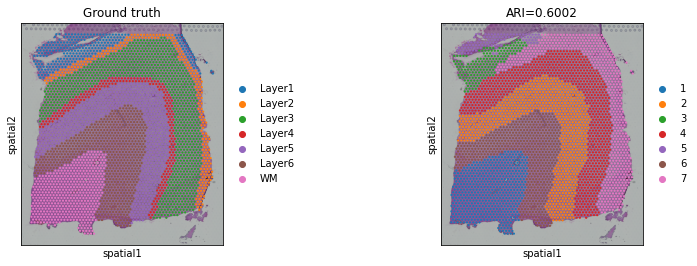

In [4]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
from temp_g_model import temp_g_model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
n_clusters = 7
file_fold = 'DATA/'
adata = sc.read_visium(file_fold, count_file='filtered_feature_bc_matrix.h5', load_images=True)
adata.var_names_make_unique()# define and train model
model = temp_g_model(adata, device=device)
adata = model.train_D()
# set radius to specify the number of neighbors considered during refinement
radius = 50

# clustering
from utils import clustering
clustering(adata, n_clusters, radius=radius, refinement=True) #For DLPFC dataset, we use optional refinement step.

df_meta = pd.read_csv(file_fold + '/metadata.tsv', sep='\t')
df_meta_layer = df_meta['layer_guess']
adata.obs['ground_truth'] = df_meta_layer.values
# filter out NA nodes
adata = adata[~pd.isnull(adata.obs['ground_truth'])]

# calculate metric ARI
ARI = metrics.adjusted_rand_score(adata.obs['domain'], adata.obs['ground_truth'])
adata.uns['ARI'] = ARI

print('ARI:', ARI)
sc.pl.spatial(adata,
              img_key="hires",
              color=["ground_truth", "domain"],
              title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)


In [11]:
pip install --user scikit-misc

Note: you may need to restart the kernel to use updated packages.
